# Bank Customer Churn prediction

### importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Basic information about data

In [3]:
df=pd.read_csv('Customer.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [5]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,50000.000000,1.569192e+07,656.484745,38.112173,5.027480,55543.233967,1.554044,0.755362,0.497465,112538.722655,0.211068
std,28867.946472,7.138503e+04,80.277631,8.832951,2.806896,62783.983783,0.547633,0.429874,0.499996,50345.231280,0.408068
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,25000.000000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,50000.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118022.820000,0.000000
75%,75000.000000,1.575667e+07,710.000000,42.000000,7.000000,119839.690000,2.000000,1.000000,1.000000,155407.210000,0.000000
max,100000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100001 non-null  int64  
 1   CustomerId       100001 non-null  int64  
 2   Surname          100001 non-null  object 
 3   CreditScore      100001 non-null  int64  
 4   Geography        100001 non-null  object 
 5   Gender           100001 non-null  object 
 6   Age              100001 non-null  float64
 7   Tenure           100001 non-null  int64  
 8   Balance          100001 non-null  float64
 9   NumOfProducts    100001 non-null  int64  
 10  HasCrCard        100001 non-null  int64  
 11  IsActiveMember   100001 non-null  int64  
 12  EstimatedSalary  100001 non-null  float64
 13  Exited           100001 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 10.7+ MB


In [7]:
df.shape

(100001, 14)

In [8]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.corr()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_9072\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,-0.003807,-0.000336,0.006463,-0.000089,0.001417,-0.001039,-0.003423,-0.000857,-0.004127,0.002809
CustomerId,-0.003807,1.000000,0.008208,0.003348,-0.001487,-0.005278,0.005153,-0.007641,-0.002529,0.004665,-0.007186
CreditScore,-0.000336,0.008208,1.000000,-0.004910,-0.000780,0.006739,0.012511,-0.000775,0.011471,-0.001791,-0.024687
Age,0.006463,0.003348,-0.004910,1.000000,-0.013404,0.064325,-0.104080,-0.012384,0.000218,-0.002589,0.345574
Tenure,-0.000089,-0.001487,-0.000780,-0.013404,1.000000,-0.009597,0.006190,0.003524,-0.003499,0.001579,-0.018561
Balance,0.001417,-0.005278,0.006739,0.064325,-0.009597,1.000000,-0.359384,-0.017846,-0.013320,0.008801,0.129556
NumOfProducts,-0.001039,0.005153,0.012511,-0.104080,0.006190,-0.359384,1.000000,0.001875,0.039587,-0.001814,-0.211580
HasCrCard,-0.003423,-0.007641,-0.000775,-0.012384,0.003524,-0.017846,0.001875,1.000000,-0.024520,0.005998,-0.021402
IsActiveMember,-0.000857,-0.002529,0.011471,0.000218,-0.003499,-0.013320,0.039587,-0.024520,1.000000,-0.007752,-0.210799
EstimatedSalary,-0.004127,0.004665,-0.001791,-0.002589,0.001579,0.008801,-0.001814,0.005998,-0.007752,1.000000,0.017158


C:\Users\Nikita\AppData\Local\Temp\ipykernel_9072\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

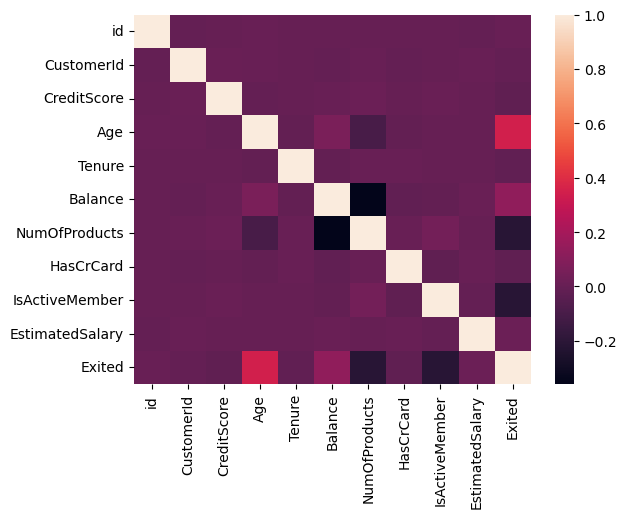

In [10]:
sns.heatmap(df.corr())

### Data Visualization

In [11]:
value_counts = df['Exited'].value_counts().reset_index()
value_counts.columns = ['Exited', 'Count']

# Plotly bar chart
fig = px.bar(value_counts, x='Exited', y='Count', title="Exited", text='Count')

# Update the layout for better aesthetics
fig.update_layout(title_text='Exited', title_x=0.5)


In [12]:
value_counts = df['Exited'].value_counts().reset_index()
value_counts.columns = ['Exited', 'Count']

# Plotly pie chart
fig = px.pie(value_counts, 
             names='Exited', 
             values='Count', 
             title='Churn Rate',
             color_discrete_sequence=['skyblue', 'lightcoral'],
             hole=0.0)  # Set hole to 0.0 for a complete pie chart

# Add percentage display
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

In [13]:
grouped_data = df.groupby(['Exited', 'Gender']).size().reset_index(name='Count')

# Plotly bar chart
fig = px.bar(grouped_data, 
             x='Exited', 
             y='Count', 
             color='Gender', 
             barmode='group',
             title='Exited vs Gender Distribution',
             color_discrete_sequence=['skyblue', 'lightcoral'])

# Update the layout for better aesthetics
fig.update_layout(title_text='Exited vs Gender Distribution', title_x=0.5)

# Show the plot
fig.show()

In [14]:
grouped_data = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Not Exited', x=grouped_data.index, y=grouped_data[0], marker_color='skyblue'),
    go.Bar(name='Exited', x=grouped_data.index, y=grouped_data[1], marker_color='lightcoral')
])

# Update the layout for a stacked bar chart
fig.update_layout(
    barmode='stack',
    title='Exited Customers by Geography',
    xaxis_title='Geography',
    yaxis_title='Number of Customers',
    legend_title='Status',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()

### Data Preprocessing

In [15]:
df=df.drop(columns=['CustomerId','Surname','EstimatedSalary','id'])

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1,0,0,0,0
1,627,1,33.0,1,0.00,2,1,1,0,0,0
2,678,1,40.0,10,0.00,2,1,0,0,0,0
3,581,1,34.0,2,148882.54,1,1,1,0,0,0
4,716,1,33.0,5,0.00,2,1,1,0,0,1


In [17]:
x=df.drop(columns='Exited')
y=df['Exited']

In [18]:
minmax_cols = ['Tenure', 'NumOfProducts']

# Select columns for standard scaling
standard_cols = ['CreditScore', 'Age', 'Balance']

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMax scaling
x[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

# Apply standard scaling
x[standard_cols] = standard_scaler.fit_transform(df[standard_cols])

# Print the scaled DataFrame
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain
0,0.143444,1,-0.578765,0.3,-0.884676,0.333333,1,0,0,0
1,-0.367287,1,-0.578765,0.1,-0.884676,0.333333,1,1,0,0
2,0.268012,1,0.213727,1.0,-0.884676,0.333333,1,0,0,0
3,-0.940301,1,-0.465552,0.2,1.486681,0.000000,1,1,0,0
4,0.741372,1,-0.578765,0.5,-0.884676,0.333333,1,1,0,1


### Data Training

In [19]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC


In [20]:
from imblearn.over_sampling import SMOTE
x_r,y_r=SMOTE().fit_resample(x,y)
y_r.value_counts()

0    78894
1    78894
Name: Exited, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2,random_state=42)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=40, max_iter=10000),
    'RandomForest': RandomForestClassifier(random_state=40),
    'DecisionTree': DecisionTreeClassifier(random_state=40),
    'GradientBoosting': GradientBoostingClassifier(random_state=40),
    'AdaBoost': AdaBoostClassifier(random_state=40)
}

# Define parameter grids
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

# Perform randomized search
best_estimators = {}
for name, classifier in classifiers.items():
    print(f"Performing Randomized Search for {name}")
    randomized_search = RandomizedSearchCV(
        estimator=classifier, 
        param_distributions=param_grids[name], 
        n_iter=10,  # Number of parameter settings sampled
        cv=3,       # Reduce the number of cross-validation folds
        n_jobs=-1, 
        verbose=1,
        random_state=40  # To ensure reproducibility
    )
    randomized_search.fit(x_train, y_train)
    best_estimators[name] = randomized_search.best_estimator_
    print(f"Best parameters for {name}: {randomized_search.best_params_}")
    print(f"Best score for {name}: {randomized_search.best_score_}\n")

# Evaluate the best models
for name, model in best_estimators.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Train accuracy of best {name}: {train_accuracy}")
    print(f"Test accuracy of best {name}: {test_accuracy}")
    

Performing Randomized Search for LogisticRegression
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best score for LogisticRegression: 0.7566505519468025

Performing Randomized Search for RandomForest
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Nikita\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best score for RandomForest: 0.8924027578630196

Performing Randomized Search for DecisionTree
Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\Nikita\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'min_samples_split': 5, 'max_depth': 20}
Best score for DecisionTree: 0.8533391565603923

Performing Randomized Search for GradientBoosting
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for GradientBoosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}
Best score for GradientBoosting: 0.9082943899723738

Performing Randomized Search for AdaBoost
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Nikita\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for AdaBoost: {'n_estimators': 200, 'learning_rate': 1}
Best score for AdaBoost: 0.8793313907609625

Train accuracy of best LogisticRegression: 0.7566505585043175
Test accuracy of best LogisticRegression: 0.7544521199062044
Train accuracy of best RandomForest: 0.999215717341361
Test accuracy of best RandomForest: 0.9055706952278345
Train accuracy of best DecisionTree: 0.9490770815178642
Test accuracy of best DecisionTree: 0.8664680905000317
Train accuracy of best GradientBoosting: 0.9179355145369563
Test accuracy of best GradientBoosting: 0.9076937702008999
Train accuracy of best AdaBoost: 0.8801869603105442
Test accuracy of best AdaBoost: 0.8785727866151214


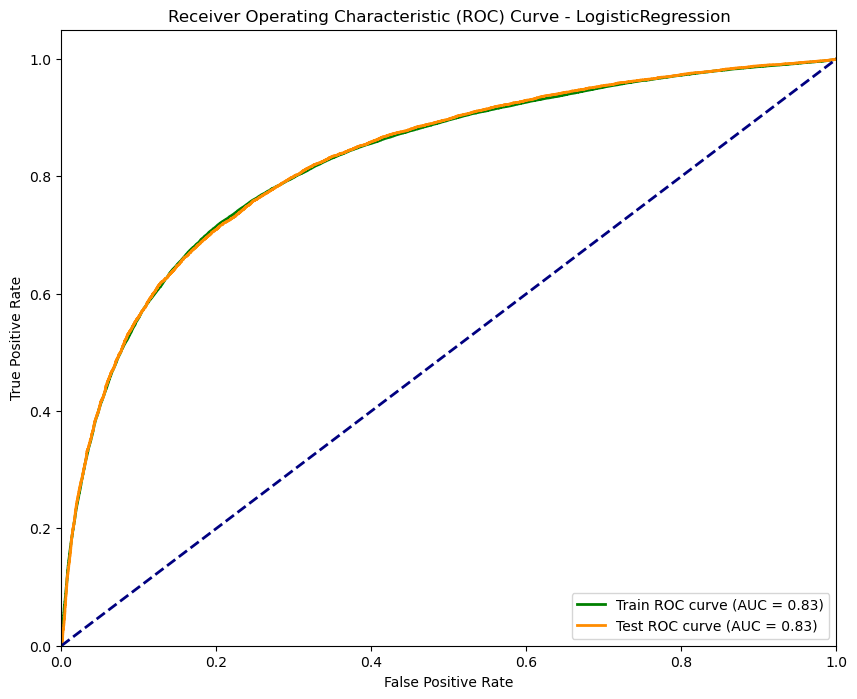

Train AUC for LogisticRegression: 0.8273204992921035
Test AUC for LogisticRegression: 0.8285124884250257


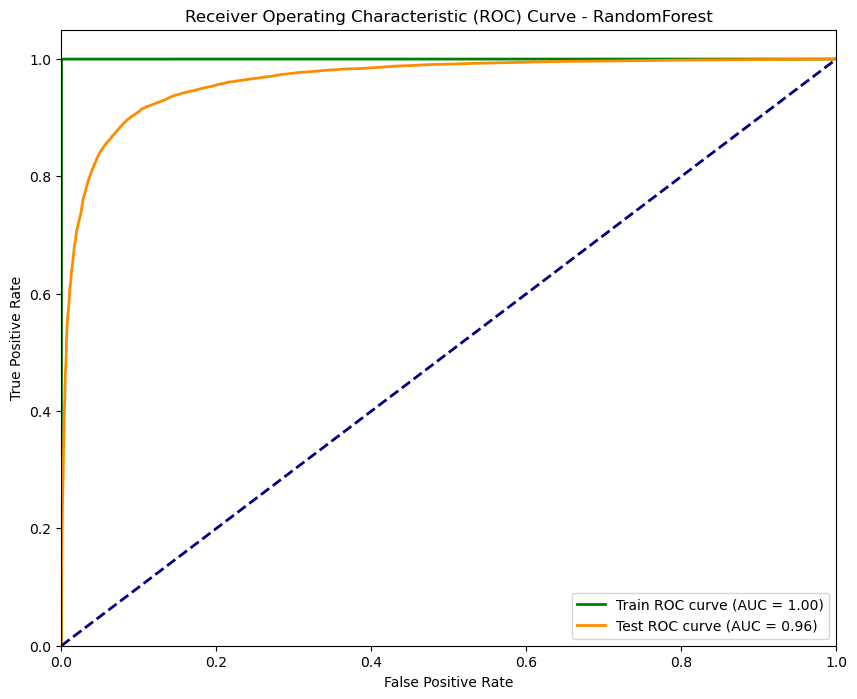

Train AUC for RandomForest: 0.9999966196838801
Test AUC for RandomForest: 0.9642373575124223


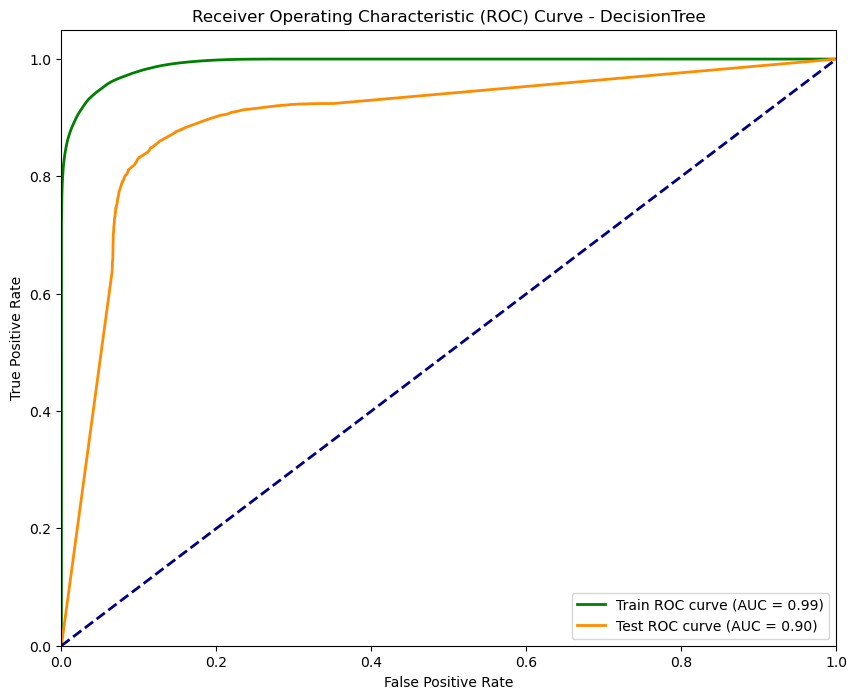

Train AUC for DecisionTree: 0.992518817688022
Test AUC for DecisionTree: 0.8984053421332538


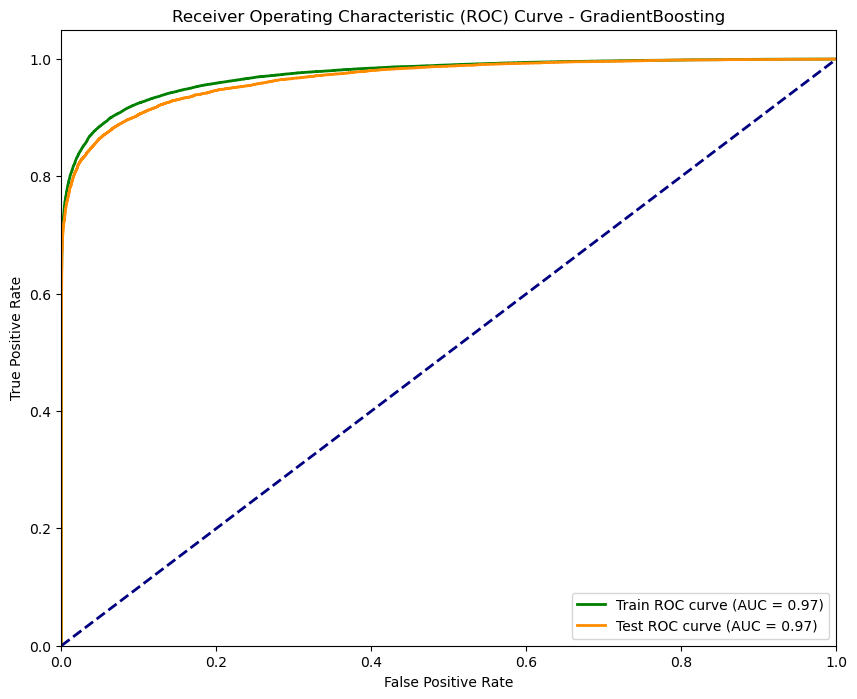

Train AUC for GradientBoosting: 0.9733373501143657
Test AUC for GradientBoosting: 0.967460908966969


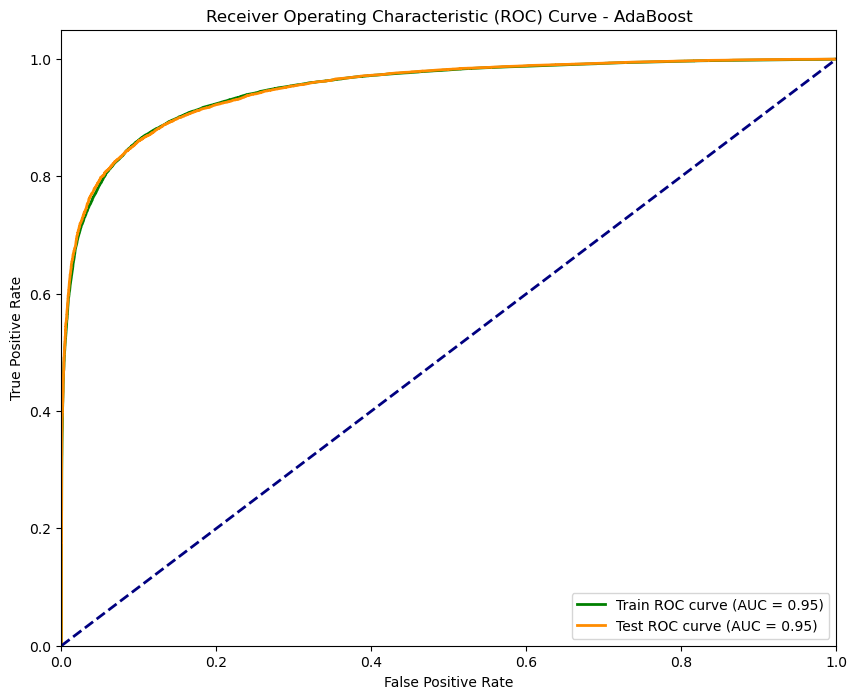

Train AUC for AdaBoost: 0.949877567638721
Test AUC for AdaBoost: 0.9504569847618568


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(model, x_train, y_train, x_test, y_test, model_name):
    plt.figure(figsize=(10, 8))
    
    # ROC curve and AUC for training set
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(x_train)[:, 1]
        y_test_proba = model.predict_proba(x_test)[:, 1]
    else:
        y_train_proba = model.decision_function(x_train)
        y_test_proba = model.decision_function(x_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green', lw=lw, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=lw, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    print(f"Train AUC for {model_name}: {roc_auc_train}")
    print(f"Test AUC for {model_name}: {roc_auc_test}")

# Plot ROC curves for each best estimator
for name, model in best_estimators.items():
    plot_roc_curve(model, x_train, y_train, x_test, y_test, name)


#### in gradient boosting algorithm the train accuracy is nearly 0.91 and test acucracy is near 0.90 so it is the best model we can consider

### Load the model

In [32]:
import pickle

gb_model = best_estimators.get('GradientBoosting')
if gb_model:
    with open('model.pkl', 'wb') as file:
        pickle.dump(gb_model, file)
    print("Gradient Boosting model saved as model.pkl")

# Load the Gradient Boosting model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Loaded model from model.pkl")

# Example prediction using the loaded model
example_pred = loaded_model.predict(x_test)
example_accuracy = accuracy_score(y_test, example_pred)
print(f"Accuracy of loaded Gradient Boosting model: {example_accuracy}")


Gradient Boosting model saved as model.pkl
Loaded model from model.pkl
Accuracy of loaded Gradient Boosting model: 0.9076937702008999


In [33]:
gb_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           random_state=40)

In [31]:
import sklearn
print(sklearn.__version__)


1.2.1
